In [3]:
import json # citire fisier
import numpy as np # X
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt # vizualizare dendograma
from sklearn.cluster import KMeans
import pandas as pd # date tensorboard
import os # tensorboard
import tensorflow as tf # tensorboard
from tensorflow.contrib.tensorboard.plugins import projector
from sklearn.decomposition import PCA as sklearnPCA # transformate date pentru tensorboard
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics.pairwise import euclidean_distances
from pyclustering.cluster.dbscan import dbscan

In [6]:
X5 = np.load('venueReduced5/X.npy')
X10 = np.load('venueReduced10/X.npy')
X15 = np.load('venueReduced15/X.npy')

## Elbow method

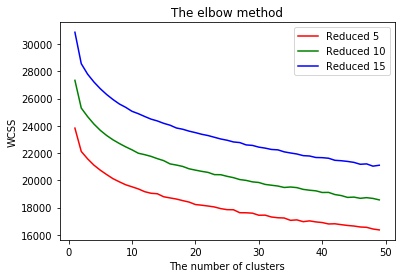

In [8]:
def elbow_kmeans(X):
    wcss = []
    for i in range(1,50):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 500, n_init = 10, random_state = 0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_) 
    return wcss

# wcss5 = elbow_kmeans(X5)
# wcss10 = elbow_kmeans(X10)
# wcss15 = elbow_kmeans(X15)
plt.plot(range(1,50), wcss5, 'r')
plt.plot(range(1,50), wcss10, 'g')
plt.plot(range(1,50), wcss15, 'b')
plt.title('The elbow method')
plt.xlabel('The number of clusters')
plt.ylabel('WCSS')
plt.legend(['Reduced 5', 'Reduced 10', 'Reduced 15'])
plt.show()

#https://medium.com/@iSunilSV/data-science-python-k-means-clustering-eed68b490e02

## K-Means and Silhouette

In [29]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
def k_means(X, n_clusters):
    fileName = './kMeansResult10/clusters' + str(n_clusters) + '/labels.tsv'
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    f = open(fileName, "w")
    for elem in kmeans.labels_:
        f.write(str(elem))
        f.write('\n')
    f.close()
    
for i in range:
    k_means(X10,i)


For n_clusters = 15 The average silhouette_score is : 0.0237850463717041
For n_clusters = 16 The average silhouette_score is : 0.023806987481302354
For n_clusters = 17 The average silhouette_score is : 0.028360251383460308
For n_clusters = 18 The average silhouette_score is : 0.027459387370839968
For n_clusters = 19 The average silhouette_score is : 0.021385540983827233


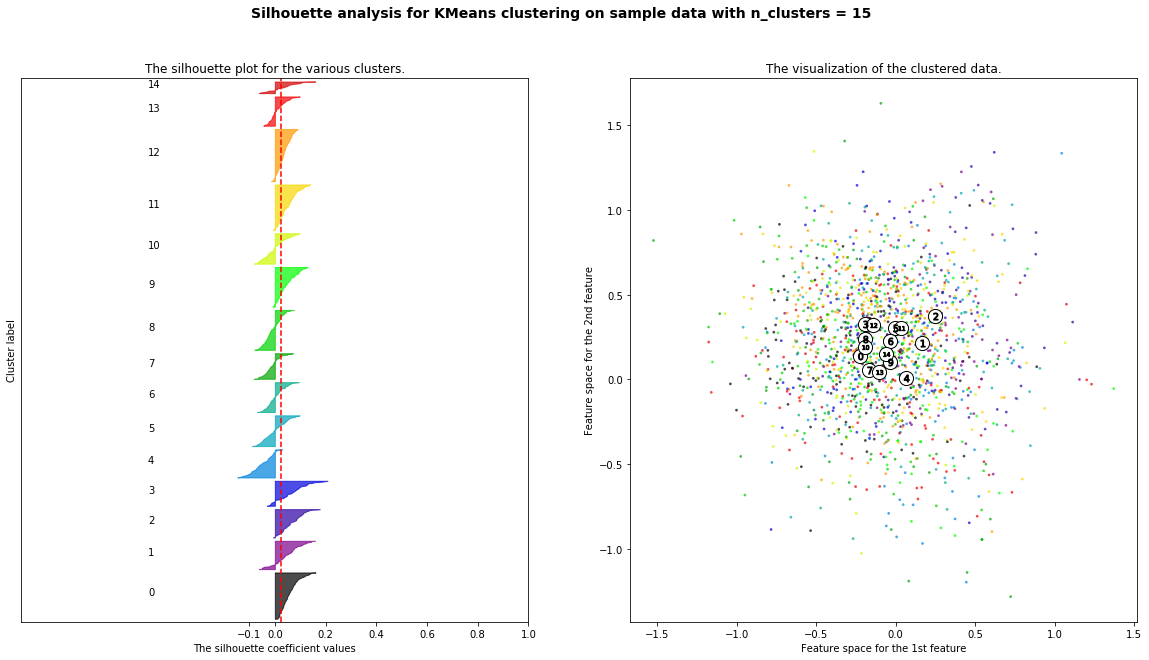

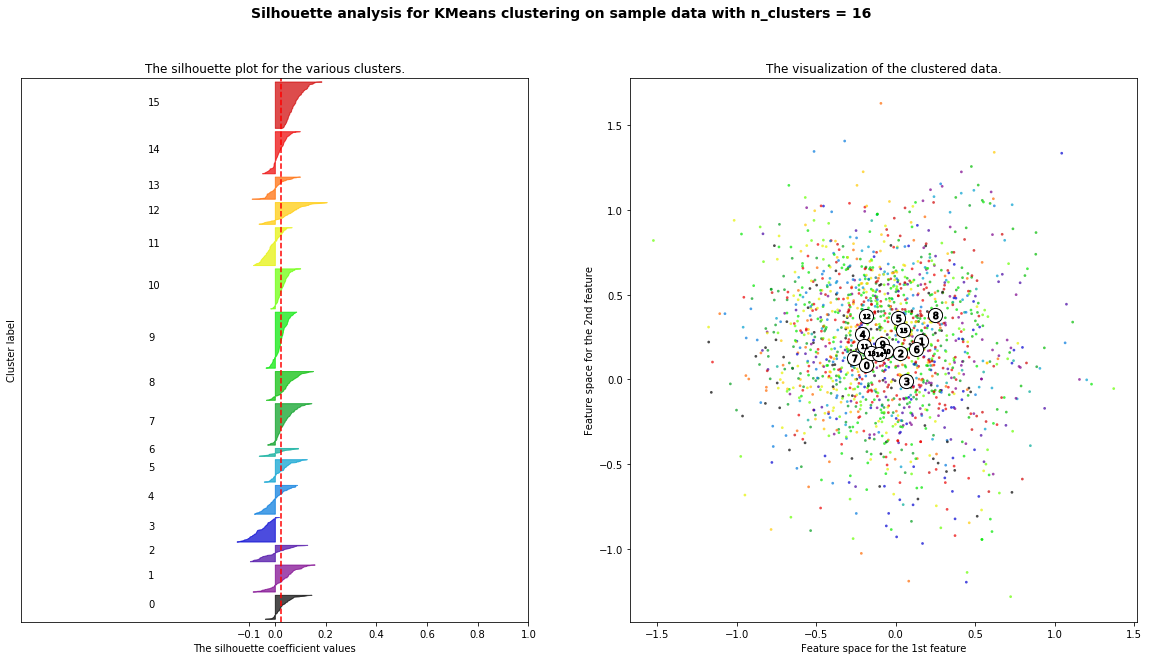

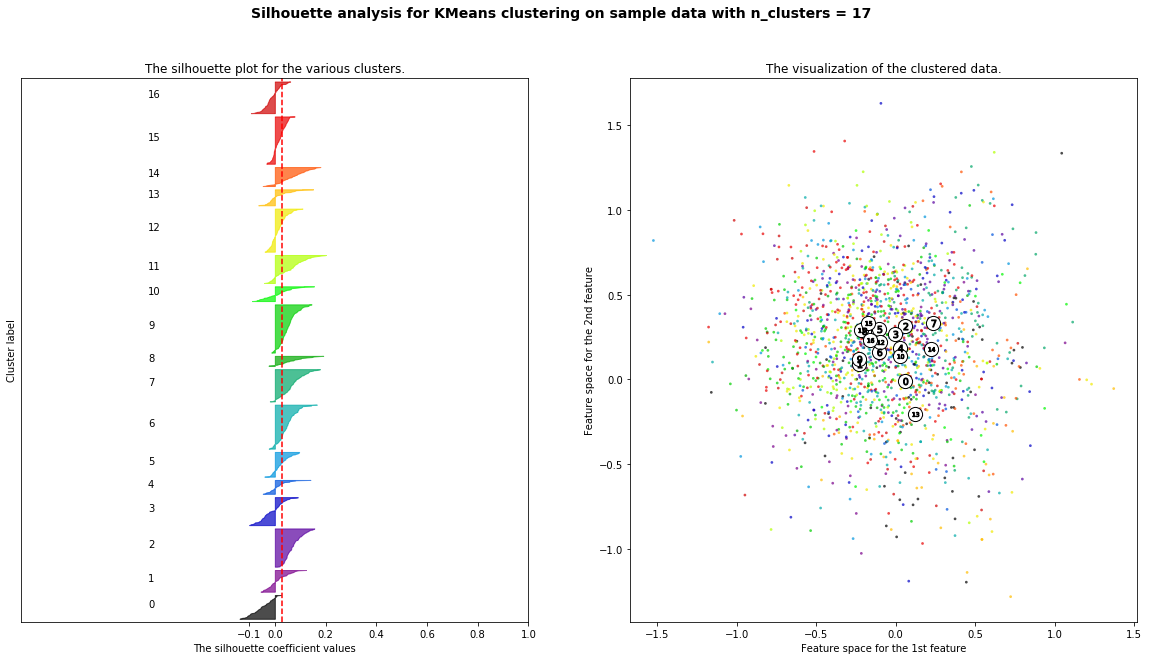

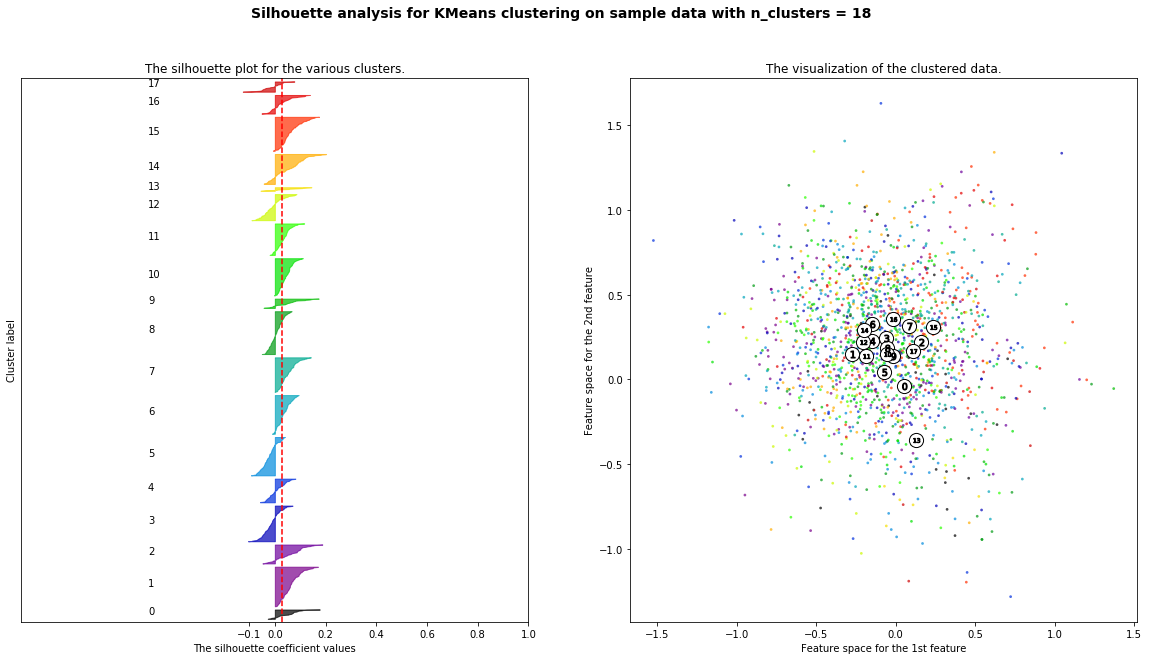

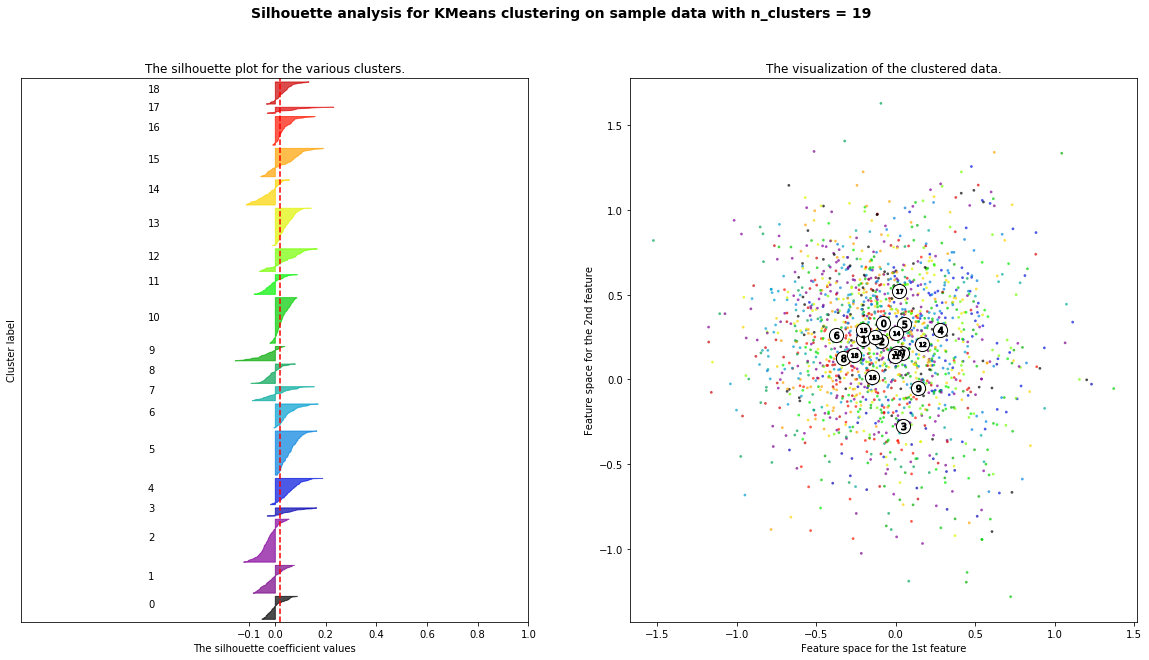

In [41]:
X = X15
for n_clusters in range(15,20):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(20, 10)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.5, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.savefig('SilhouetteAnalysis15.png')

## DUNN Index

In [37]:
def delta_fast(ck, cl, distances):
    values = distances[np.where(ck)][:, np.where(cl)]
    values = values[np.nonzero(values)]

    return np.min(values)
    
def big_delta_fast(ci, distances):
    values = distances[np.where(ci)][:, np.where(ci)]
    #values = values[np.nonzero(values)]
            
    return np.max(values)
    
def dunn(points, labels):
    """  points : np.array   np.array([N, p]) of all points
    labels: np.array   np.array([N]) labels of all points
    """
    distances = euclidean_distances(points)
    ks = np.sort(np.unique(labels))
    
    deltas = np.ones([len(ks), len(ks)])*1000000
    big_deltas = np.zeros([len(ks), 1])
    
    l_range = list(range(0, len(ks)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta_fast((labels == ks[k]), (labels == ks[l]), distances)
        
        big_deltas[k] = big_delta_fast((labels == ks[k]), distances)

    di = np.min(deltas)/np.max(big_deltas)
    return di

In [56]:
X = X15
df = pd.DataFrame(X) 
  
for i in range(15,20):
    k_means = KMeans(n_clusters=i, random_state=0) 
    k_means.fit(df) #K-means training 
    print(i, dunn(X, k_means.labels_))
    

15 0.10894449350267464
16 0.12137890638544334
17 0.10402388312848228
18 0.12132111165424582
19 0.11530323047700793


## Tensorboard

In [6]:
pca = sklearnPCA(n_components=20) #2-dimensional PCA
pca_df = pd.DataFrame(pca.fit_transform(X15))
df_pca = pca_df.values

tf_data = tf.Variable(df_pca)

PATH = os.getcwd()

LOG_DIR = PATH + '/kMeansResult15/clusters15'

metadata = os.path.join(LOG_DIR, 'labels.tsv')

tf_data = tf.Variable(df_pca)

with tf.Session() as sess:
    saver = tf.train.Saver([tf_data])
    sess.run(tf.global_variables_initializer())
    saver.save(sess, os.path.join(LOG_DIR, 'tf_data.ckpt'))
    config = projector.ProjectorConfig()
    
    embedding = config.embeddings.add()
    embedding.tensor_name = tf_data.name
    
    embedding.metadata_path = metadata
    
    projector.visualize_embeddings(tf.summary.FileWriter(LOG_DIR), config)

## Apply DBSCAN

In [50]:
sample = X10

# eps = [1,2,3,4,5,6,7,8,9,
#       10,11,12,13,14,15,16,17,18,0.19,
#       0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,
#       0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,
#       0.4,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,
#       0.5,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,
#       0.6,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,
#       0.7,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,
#       0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,
#       0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]
eps = 1
i = 0
while i < 100:
    min_s = 1
    while min_s < 10:

        dbscan_instance = dbscan(sample, eps, min_s)
        dbscan_instance.process()
        clusters = dbscan_instance.get_clusters()
        noise = dbscan_instance.get_noise()
        print(str(eps) + ' ' + str(min_s) + ' clusters=' + str(len(clusters)) + ' noise=' + str(len(noise)))
        min_s += 1
    eps +=1
    i += 1

1 1 clusters=3 noise=1361
1 2 clusters=0 noise=1367
1 3 clusters=0 noise=1367
1 4 clusters=0 noise=1367
1 5 clusters=0 noise=1367
1 6 clusters=0 noise=1367
1 7 clusters=0 noise=1367
1 8 clusters=0 noise=1367
1 9 clusters=0 noise=1367
2 1 clusters=24 noise=1314
2 2 clusters=5 noise=1352
2 3 clusters=0 noise=1367
2 4 clusters=0 noise=1367
2 5 clusters=0 noise=1367
2 6 clusters=0 noise=1367
2 7 clusters=0 noise=1367
2 8 clusters=0 noise=1367
2 9 clusters=0 noise=1367
3 1 clusters=105 noise=857
3 2 clusters=49 noise=969
3 3 clusters=22 noise=1099
3 4 clusters=11 noise=1183
3 5 clusters=4 noise=1226
3 6 clusters=3 noise=1253
3 7 clusters=1 noise=1274
3 8 clusters=2 noise=1291
3 9 clusters=1 noise=1306
4 1 clusters=21 noise=338
4 2 clusters=4 noise=372
4 3 clusters=2 noise=385
4 4 clusters=1 noise=399
4 5 clusters=1 noise=409
4 6 clusters=1 noise=413
4 7 clusters=1 noise=426
4 8 clusters=1 noise=432
4 9 clusters=1 noise=436
5 1 clusters=1 noise=73
5 2 clusters=1 noise=73
5 3 clusters=1 noise

KeyboardInterrupt: 

## Test DBSCAN

In [69]:
dbscan_instance = dbscan(X10, 4, 1)
dbscan_instance.process()
clusters = dbscan_instance.get_clusters()
noise = dbscan_instance.get_noise()
print(' clusters=' + str(len(clusters)) + ' noise=' + str(len(noise)))

 clusters=21 noise=338


In [74]:
labels_db = np.zeros(len(X10))
i = 0
for list_c in clusters:
    for elem in list_c:
        labels_db[elem] = i
    i += 1

In [75]:
print(dunn(X10, labels_db))


0.37830940481283704


In [78]:
# Create a subplot with 1 row and 2 columns
fig.set_size_inches(30, 20)

# The 1st subplot is the silhouette plot
ax1.set_xlim([-1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

cluster_labels = labels_db
X = X10
n_clusters = 21

silhouette_avg = silhouette_score(X, cluster_labels)
print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
sample_silhouette_values = silhouette_samples(X, cluster_labels)
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.5, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
              "with n_clusters = %d" % n_clusters),
             fontsize=14, fontweight='bold')

plt.show()

For n_clusters = 21 The average silhouette_score is : -0.10391220546615566


<Figure size 432x288 with 0 Axes>

In [79]:
print(len(clusters[0]))

985
